<a href="https://colab.research.google.com/github/MasiboBrian/AirBNB-Price-Prediction/blob/master/Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import sequence
from keras.preprocessing.text import text_to_word_sequence, Tokenizer
from matplotlib import pyplot as plt
import pandas as pd

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import dataset
path1 = '/content/drive/MyDrive/data1.csv'
text = pd.read_csv(path1)
text.shape

(66, 3)

In [ ]:
#Drop rows with missing data
text = text.dropna()
text.head(10)

,Labels,sublabels,Text
0,SQL Tutorial,Examples in Each Chapter,"With our online SQL editor, you can edit the S..."
1,SQL Tutorial,SQL Exercises,Insert the missing statement to get all the co...
2,SQL Tutorial,SQL Examples,Learn by examples! This tutorial supplements a...
3,SQL Tutorial,SQL Quiz Test,Test your SQL skills at W3Schools!
4,SQL Tutorial,SQL References,At W3Schools you will find a complete referenc...
5,SQL Tutorial,SQL Data Types,"Data types and ranges for Microsoft Access, My..."
6,Introduction to SQL,What is SQL?,SQL stands for Structured Query Language SQL l...
7,Introduction to SQL,What Can SQL do?,SQL can execute queries against a database SQL...
8,Introduction to SQL,SQL is a Standard - BUT....,"Although SQL is an ANSI/ISO standard, there ar..."
9,Introduction to SQL,Using SQL in Your Web Site,To build a web site that shows data from a dat...


## twende

In [ ]:
"""
sentences = ['this is the first sentence for word2vec',
             'this is the second sentence',
             'yet another sentence',
             'one more sentence',
             'and the final sentence']

window_size = 2
"""

"\nsentences = ['this is the first sentence for word2vec',\n             'this is the second sentence',\n             'yet another sentence',\n             'one more sentence',\n             'and the final sentence']\n\nwindow_size = 2\n"

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)
words = list()
one_hot = list()
words_to_num = tokenizer.word_index

vocab = len(words_to_num)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocab, output_dim=2, input_shape=(2,)))
model.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(2,)))
model.add(Dense(vocab, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 2, 2)              6         
                                                                 
 lambda_1 (Lambda)           (None, 2)                 0         
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [ ]:
encoded_sentences = list()
for sentence_idx in range(len(sentences)):
  encoded_sentence = list()
  sentence = sentences[sentence_idx].split(' ')
  for word_idx in range(len(sentence)):
    num = words_to_num[sentence[word_idx]] - 1
    encoded_sentence.append(num)

  encoded_sentences.append(encoded_sentence)

KeyError: ignored

In [ ]:
encoded_sentences

[[2, 3, 1, 4, 0, 5, 6],
 [2, 3, 1, 7, 0],
 [8, 9, 0],
 [10, 11, 0],
 [12, 1, 13, 0]]

In [ ]:
sentences

['this is the first sentence for word2vec',
 'this is the second sentence',
 'yet another sentence',
 'one more sentence',
 'and the final sentence']

In [ ]:
epochs = 2000

for epoch in range(epochs):
  for sentence in encoded_sentences:
    for target_idx in range(window_size, len(sentence)):
      X = np.array(sentence[target_idx - window_size : target_idx]).reshape((1, -1))
      y = to_categorical(y=sentence[target_idx], num_classes=vocab, dtype='int').reshape((1, -1))
      loss = model.train_on_batch(X, y)

  print(loss)

2.6319656372070312
2.616581678390503
2.6011860370635986
2.5858397483825684
2.5704851150512695
2.5550668239593506
2.539543867111206
2.5238864421844482
2.508071184158325
2.492079734802246
2.4758963584899902
2.459507703781128
2.4429025650024414
2.4260709285736084
2.4090046882629395
2.3916966915130615
2.374140501022339
2.3563318252563477
2.338266372680664
2.319941520690918
2.3013558387756348
2.282508373260498
2.263399839401245
2.2440316677093506
2.2244060039520264
2.204526424407959
2.184396982192993
2.164022922515869
2.1434102058410645
2.122565746307373
2.101497173309326
2.0802125930786133
2.0587210655212402
2.0370326042175293
2.0151569843292236
1.9931052923202515
1.9708888530731201
1.9485195875167847
1.9260094165802002
1.9033710956573486
1.880617618560791
1.857762336730957
1.8348186016082764
1.8118001222610474
1.7887210845947266
1.7655953168869019
1.7424368858337402
1.7192602157592773
1.6960792541503906
1.672908067703247
1.6497609615325928
1.6266518831253052
1.6035945415496826
1.580602884

In [ ]:
vectors = model.get_weights()[0]

In [ ]:
for key in words_to_num.keys():
  words_to_num[key] -= 1

In [ ]:
keys = list(words_to_num.keys())
values = list(words_to_num.values())

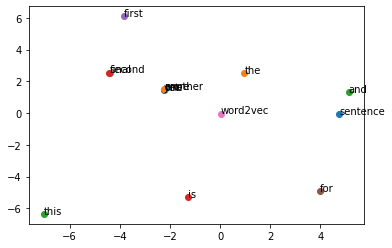

In [ ]:
for idx in values:
  x, y = vectors[idx][0], vectors[idx][1]
  plt.scatter(x, y)
  plt.annotate(keys[idx], (x, y))
